<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# An Analysis of Regression Models for NBA Salary Prediction

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Mapping the system](#3.2-Mapping-the-system)
    - [3.3 Defining suitable metrics](#3.3-Defining-suitable-metrics)
    - [3.4 Method selection](#3.4-Method-selection)
- [4. Code](#4.-Code)
    - [4.1 Pre-processing](#Pre-processing)
    - [4.2 Exploratory data analysis](#Exploratory-Data-Analysis)
    - [4.3 Linear regression](#Linear-Regression)
    - [4.4 Ridge](#Ridge)
    - [4.5 Random forest](#Random-Forest)
    - [4.6 Gradient boosting](#Gradient-Boosting)
    - [4.7 Model comparison](#Model-Comparison)
- [5. Results](#5.-Results)
- [6. Conclusion](#6.-Conclusion)
- [7. Sources](#Sources)

##  Abstract

In the National Basketball Association (NBA), teams must decide how much to offer a player when his current contract expires if they want to retain him or sign him if he was not previously with them. They must take into consideration the skill and value of the player as well as the salary cap. This decision can be difficult because overpaying or undervaluing players each has its downsides. Thus, an empirical approach that identifies important statistics related to a player's value would serve useful for teams looking to make decisions about players on expiring contracts. This project aimed to use recursive feature elimination (RFE) for feature selection with a multiple linear regression (MLR) model to determine what regular season statistics for a player in the 2020-21 season can predict how much he is being paid that season and how accurately. Furthermore, three additional techniques were used to compare performance with MLR: ridge regression, random forest regression, gradient boosting regression. It was found that no single model outperformed the others in a statistically significant manner when comparing cross-validation means for $R^{2}$ scores for predictions. This was likely due to high variability in model performance rather than model selection itself and identifying the source of such variability could increase model precision. Eliminating unnecessary variability would allow for the reliable recommendation of models with seemingly superior performance.  

## Introduction

## 1. The problem

Player acquisition via free agency is one of the most common ways by which a team can add a player previously not on their team. However, they should consider the salary cap, which can be exceeded resulting in some penalties in free agency, and the luxury tax, which can also be exceeded resulting in a financial penalty that increases depending on the amount over the threshold and whether the team is a repeat offender. For the 2020-21 season, the salary cap was \\$109,140,000 and the luxury tax line was $132,627,000. As a result, teams fall into three categories, which can be seen in the table below:

| Financial Situation | Number of Teams | 
| :- | :-: | 
| Below Salary Cap | 4 |
| Above Salary Cap & Below Luxury Tax | 18 |
| Above Luxury Tax | 8 |
| Total | 30 |

As can be seen, most teams are willing to exceed the salary cap but not the financial penalty of the luxury tax so accurate player valuation is key when trying to sign players during free agency. Overpaying a player will increase the likelihood a player will sign with them but could cause issues for the team if the player underperforms. In addition to reducing roster flexibility and creating cap issues, significant underperformance would make it difficult for the team to move on from him via a trade because of his perceived lower trade value. Undervaluing a player may dissatisfy him and increases the chance on missing out on said player if he has other teams interested in him. It may also cause issues for a team's image if it is known to habitually undervalue players as free agents would be less likely to sign there.  

[Back to top](#Table-of-contents)

## 2. Purpose of the study

An empirical approach that values a player based on the player's on-court production may be suitable especially for players who are not superstars. Desirable outcomes include: establishing multiple models that can fairly accurately predict NBA salaries, determining which models are superior, if any, and understanding why the results were the way they were.


[Back to top](#Table-of-contents)

## 3. Project description

Multiple linear regression was performed to model the relationship between a player's statistics and the amount of the cap space he took up. RFE with grid-search cross-validation removed features with low weights beforehand. Afterwards, ridge regression, random forest regression, gradient boosting regression were performed on the dataset with cross-validation to compare model performance. Pairwise t-tests were performed on all potential pairs to determine which models outperformed others in a statistically significant manner, if any.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis

$H_{0}$ : All models will have the same performance

$H_{a}$ : At least one model will perform better than the others

[Back to top](#Table-of-contents)

### 3.2 Mapping the system

A player has normal statistics that he accumulates per game such as points, rebounds, assists, etc. There are also advanced statistics such as true shooting percentage (TS%), which is a measure of offensive efficiency that takes into account 2-pt shots, 3-pt shots, and free throws. Advanced statistics are often functions of normal statistics, team statistics, and other advanced statistics. For example, TS% is calculated as shown below:

$TS\% = \frac{PTS}{2(TSA)} $

where $ TSA = FGA + 0.44 FTA $

PTS = points

TSA = true shooting attempts

FGA = field goal attempts

FTA = free throw attempts

All normal and advanced statistics from active players in the 2020-21 season were taken from Basketball Reference and these represented the features. Normal statistics were divided on a per game basis as some players played more games than others and a minimum game restriction of thirty-six (at least half the season) was applied to make season per game stats as accurate as possible. Salaries were also taken from Basketball Reference and expressed as a percentage of the cap as salaries otherwise ranged from tens of thousands of dollars to tens of millions of dollars. A custom database was created which contained the features, normal and advanced statistics, and the target, cap percentage, per player. Using the minimum game criterion, 341 of the 513 players that were paid a salary in the 2020-21 season were in the final database.      

[Back to top](#Table-of-contents)

### 3.3 Defining suitable metrics

If the pairwise t-tests had a p-value lower than a significance level of 0.05, then the null hypothesis that all models have the same performace can be rejected. The amount by which it differs from 0.05 can serve as an indicator of the degree to which the problem can be solved. Rejecting the null hypothesis would allow for the conclusion that certain models are more useful in predicting NBA player salary than others.

[Back to top](#Table-of-contents)

### 3.4 Method selection  

Multiple linear regression seems to be a proper starting point given the large number of features in the dataset. Grid-search cross-validation with a varying number of features and RFE would allow for the determination of the optimal number of features. Ridge regression was considered because of the high number of features, particularly the advanced statistics, that were related to each other or functions of each other. Random forest regression and gradient boosting regression were each considered because of their performance and their use of decision trees.

[Back to top](#Table-of-contents)

## 4. Code

### Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import warnings 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import mlxtend

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
stats = pd.read_excel('data/player_data.xlsx')

In [3]:
stats.info()
stats = stats.drop(['Rk'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      500 non-null    float64
 1   Player  540 non-null    object 
 2   Pos     540 non-null    object 
 3   Age     540 non-null    int64  
 4   Tm      540 non-null    object 
 5   G       540 non-null    int64  
 6   GS      540 non-null    int64  
 7   MP      540 non-null    int64  
 8   FG      540 non-null    int64  
 9   FGA     540 non-null    int64  
 10  FG%     539 non-null    float64
 11  3P      540 non-null    int64  
 12  3PA     540 non-null    int64  
 13  3P%     521 non-null    float64
 14  2P      540 non-null    int64  
 15  2PA     540 non-null    int64  
 16  2P%     535 non-null    float64
 17  eFG%    539 non-null    float64
 18  FT      540 non-null    int64  
 19  FTA     540 non-null    int64  
 20  FT%     522 non-null    float64
 21  ORB     540 non-null    int64  
 22  DR

In [4]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,PG,32,GSW,63,63,2152,658,1365,0.482,337,801,0.421,321,564,0.569,0.605,362,395,0.916,29,316,345,363,77,8,213,119,2015
1,Damian Lillard,PG,30,POR,67,67,2398,602,1334,0.451,275,704,0.391,327,630,0.519,0.554,449,484,0.928,32,251,283,505,62,17,203,102,1928
2,Nikola Jokić,C,25,DEN,72,72,2488,732,1293,0.566,92,237,0.388,640,1056,0.606,0.602,342,394,0.868,205,575,780,599,95,48,222,192,1898
3,Bradley Beal,SG,27,WAS,60,60,2147,670,1382,0.485,130,373,0.349,540,1009,0.535,0.532,408,459,0.889,72,211,283,265,69,22,187,140,1878
4,Luka Dončić,PG,21,DAL,66,66,2262,647,1351,0.479,192,548,0.350,455,803,0.567,0.550,344,471,0.730,54,473,527,567,64,36,281,152,1830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Nick Richards,PF,23,CHO,18,0,63,4,9,0.444,0,1,0.000,4,8,0.500,0.444,7,11,0.636,4,7,11,2,0,0,3,7,15
536,Cameron Reynolds,SF,25,TOT,5,0,40,6,18,0.333,3,12,0.250,3,6,0.500,0.417,0,0,NaN,2,3,5,2,0,0,0,2,15
537,James Nunnally,SF,30,NOP,9,0,48,5,13,0.385,4,12,0.333,1,1,1.000,0.538,1,2,0.500,2,7,9,3,0,0,2,1,15
538,Adam Mokoka,SG,22,CHI,14,0,56,7,19,0.368,1,10,0.100,6,9,0.667,0.395,0,1,0.000,1,4,5,5,2,1,5,5,15


In [5]:
salaries = pd.read_excel('data/salaries.xlsx')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rk            513 non-null    int64  
 1   Player        513 non-null    object 
 2   Tm            513 non-null    object 
 3   2020-21       512 non-null    float64
 4   2021-22       335 non-null    float64
 5   2022-23       196 non-null    float64
 6   2023-24       88 non-null     float64
 7   2024-25       20 non-null     float64
 8   2025-26       6 non-null      float64
 9   Signed Using  402 non-null    object 
 10  Guaranteed    490 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 44.2+ KB


In [6]:
salaries=salaries.drop(['Rk','2021-22','2022-23','2023-24','2024-25','2025-26','Signed Using','Guaranteed','Tm'],axis=1)

In [7]:
salaries.Player = salaries.Player.apply(lambda name: name.split('\\', 1)[0])

In [8]:
salaries

,Player,2020-21
0,Stephen Curry,43006362.0
1,Russell Westbrook,41358814.0
2,Chris Paul,41358814.0
3,John Wall,41254920.0
4,James Harden,40824000.0
...,...,...
508,Troy Williams,122741.0
509,Freddie Gillespie,116903.0
510,Demetrius Jackson,92857.0
511,Chimezie Metu,700000.0


In [9]:
total_stats = stats.merge(salaries)

In [10]:
total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   478 non-null    object 
 1   Pos      478 non-null    object 
 2   Age      478 non-null    int64  
 3   Tm       478 non-null    object 
 4   G        478 non-null    int64  
 5   GS       478 non-null    int64  
 6   MP       478 non-null    int64  
 7   FG       478 non-null    int64  
 8   FGA      478 non-null    int64  
 9   FG%      478 non-null    float64
 10  3P       478 non-null    int64  
 11  3PA      478 non-null    int64  
 12  3P%      465 non-null    float64
 13  2P       478 non-null    int64  
 14  2PA      478 non-null    int64  
 15  2P%      476 non-null    float64
 16  eFG%     478 non-null    float64
 17  FT       478 non-null    int64  
 18  FTA      478 non-null    int64  
 19  FT%      471 non-null    float64
 20  ORB      478 non-null    int64  
 21  DRB      478 non

In [11]:
salary_cap = 109140000

In [12]:
total_stats['cap_percentage'] = total_stats['2020-21']/salary_cap

In [13]:
total_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2020-21,cap_percentage
0,Stephen Curry,PG,32,GSW,63,63,2152,658,1365,0.482,337,801,0.421,321,564,0.569,0.605,362,395,0.916,29,316,345,363,77,8,213,119,2015,43006362.0,0.394048
1,Damian Lillard,PG,30,POR,67,67,2398,602,1334,0.451,275,704,0.391,327,630,0.519,0.554,449,484,0.928,32,251,283,505,62,17,203,102,1928,31626953.0,0.289783
2,Nikola Jokić,C,25,DEN,72,72,2488,732,1293,0.566,92,237,0.388,640,1056,0.606,0.602,342,394,0.868,205,575,780,599,95,48,222,192,1898,28542009.0,0.261517
3,Bradley Beal,SG,27,WAS,60,60,2147,670,1382,0.485,130,373,0.349,540,1009,0.535,0.532,408,459,0.889,72,211,283,265,69,22,187,140,1878,28751775.0,0.263439
4,Luka Dončić,PG,21,DAL,66,66,2262,647,1351,0.479,192,548,0.350,455,803,0.567,0.550,344,471,0.730,54,473,527,567,64,36,281,152,1830,8049360.0,0.073753


In [14]:
advanced = pd.read_excel('data/advanced.xlsx')

In [15]:
advanced.Player = advanced.Player.apply(lambda name: name.split('\\', 1)[0])

In [16]:
all_stats = stats.merge(advanced).merge(total_stats)

In [17]:
all_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          478 non-null    object 
 1   Pos             478 non-null    object 
 2   Age             478 non-null    int64  
 3   Tm              478 non-null    object 
 4   G               478 non-null    int64  
 5   GS              478 non-null    int64  
 6   MP              478 non-null    int64  
 7   FG              478 non-null    int64  
 8   FGA             478 non-null    int64  
 9   FG%             478 non-null    float64
 10  3P              478 non-null    int64  
 11  3PA             478 non-null    int64  
 12  3P%             465 non-null    float64
 13  2P              478 non-null    int64  
 14  2PA             478 non-null    int64  
 15  2P%             476 non-null    float64
 16  eFG%            478 non-null    float64
 17  FT              478 non-null    int

In [18]:
all_stats.drop_duplicates(inplace=True)

is_NaN = all_stats.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = all_stats[row_has_NaN]

all_stats.dropna(subset=['2020-21'],inplace=True)

In [19]:
all_stats.fillna(0,inplace=True)

In [20]:
all_stats.drop(['Rk','2020-21'],axis=1,inplace=True)

In [21]:
all_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cap_percentage
0,Stephen Curry,PG,32,GSW,63,63,2152,658,1365,0.482,337,801,0.421,321,564,0.569,0.605,362,395,0.916,29,316,345,363,77,8,213,119,2015,26.3,0.655,0.587,0.289,1.5,15.4,8.5,30.5,1.7,0.3,12.2,34.8,6.5,2.5,9.0,0.201,8.1,0.0,8.1,5.5,0.394048
1,Damian Lillard,PG,30,POR,67,67,2398,602,1334,0.451,275,704,0.391,327,630,0.519,0.554,449,484,0.928,32,251,283,505,62,17,203,102,1928,25.6,0.623,0.528,0.363,1.4,11.5,6.3,34.6,1.3,0.6,11.6,31.4,9.6,0.8,10.4,0.209,7.4,-1.6,5.9,4.8,0.289783
2,Nikola Jokić,C,25,DEN,72,72,2488,732,1293,0.566,92,237,0.388,640,1056,0.606,0.602,342,394,0.868,205,575,780,599,95,48,222,192,1898,31.3,0.647,0.183,0.305,9.4,26.1,17.8,40.4,1.9,1.9,13.1,29.6,12.2,3.4,15.6,0.301,9.2,2.5,11.7,8.6,0.261517
3,Bradley Beal,SG,27,WAS,60,60,2147,670,1382,0.485,130,373,0.349,540,1009,0.535,0.532,408,459,0.889,72,211,283,265,69,22,187,140,1878,22.7,0.593,0.270,0.332,3.6,10.4,7.0,21.3,1.5,0.9,10.6,34.1,4.2,1.7,5.9,0.132,4.9,-1.7,3.2,2.8,0.263439
4,Luka Dončić,PG,21,DAL,66,66,2262,647,1351,0.479,192,548,0.350,455,803,0.567,0.550,344,471,0.730,54,473,527,567,64,36,281,152,1830,25.3,0.587,0.406,0.349,2.7,22.9,12.8,44.1,1.4,1.5,15.3,36.0,5.1,2.6,7.7,0.163,6.1,0.6,6.7,5.0,0.073753


In [22]:
per_game = all_stats.copy()
per_game.MP = per_game.MP/per_game.G
per_game.FG = per_game.FG/per_game.G
per_game.FGA = per_game.FGA/per_game.G
per_game['3P'] = per_game['3P']/per_game.G
per_game['3PA'] = per_game['3PA']/per_game.G
per_game['2P'] = per_game['2P']/per_game.G
per_game['2PA'] = per_game['2PA']/per_game.G
per_game.FT = per_game.FT/per_game.G
per_game.FTA = per_game.FTA/per_game.G
per_game.ORB = per_game.ORB/per_game.G
per_game.DRB = per_game.DRB/per_game.G
per_game.TRB = per_game.TRB/per_game.G
per_game.AST = per_game.AST/per_game.G
per_game.STL = per_game.STL/per_game.G
per_game.BLK = per_game.BLK/per_game.G
per_game.TOV = per_game.TOV/per_game.G
per_game.PF = per_game.PF/per_game.G
per_game.PTS = per_game.PTS/per_game.G

In [23]:
per_game.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cap_percentage
0,Stephen Curry,PG,32,GSW,63,63,34.158730,10.444444,21.666667,0.482,5.349206,12.714286,0.421,5.095238,8.952381,0.569,0.605,5.746032,6.269841,0.916,0.460317,5.015873,5.476190,5.761905,1.222222,0.126984,3.380952,1.888889,31.984127,26.3,0.655,0.587,0.289,1.5,15.4,8.5,30.5,1.7,0.3,12.2,34.8,6.5,2.5,9.0,0.201,8.1,0.0,8.1,5.5,0.394048
1,Damian Lillard,PG,30,POR,67,67,35.791045,8.985075,19.910448,0.451,4.104478,10.507463,0.391,4.880597,9.402985,0.519,0.554,6.701493,7.223881,0.928,0.477612,3.746269,4.223881,7.537313,0.925373,0.253731,3.029851,1.522388,28.776119,25.6,0.623,0.528,0.363,1.4,11.5,6.3,34.6,1.3,0.6,11.6,31.4,9.6,0.8,10.4,0.209,7.4,-1.6,5.9,4.8,0.289783
2,Nikola Jokić,C,25,DEN,72,72,34.555556,10.166667,17.958333,0.566,1.277778,3.291667,0.388,8.888889,14.666667,0.606,0.602,4.750000,5.472222,0.868,2.847222,7.986111,10.833333,8.319444,1.319444,0.666667,3.083333,2.666667,26.361111,31.3,0.647,0.183,0.305,9.4,26.1,17.8,40.4,1.9,1.9,13.1,29.6,12.2,3.4,15.6,0.301,9.2,2.5,11.7,8.6,0.261517
3,Bradley Beal,SG,27,WAS,60,60,35.783333,11.166667,23.033333,0.485,2.166667,6.216667,0.349,9.000000,16.816667,0.535,0.532,6.800000,7.650000,0.889,1.200000,3.516667,4.716667,4.416667,1.150000,0.366667,3.116667,2.333333,31.300000,22.7,0.593,0.270,0.332,3.6,10.4,7.0,21.3,1.5,0.9,10.6,34.1,4.2,1.7,5.9,0.132,4.9,-1.7,3.2,2.8,0.263439
4,Luka Dončić,PG,21,DAL,66,66,34.272727,9.803030,20.469697,0.479,2.909091,8.303030,0.350,6.893939,12.166667,0.567,0.550,5.212121,7.136364,0.730,0.818182,7.166667,7.984848,8.590909,0.969697,0.545455,4.257576,2.303030,27.727273,25.3,0.587,0.406,0.349,2.7,22.9,12.8,44.1,1.4,1.5,15.3,36.0,5.1,2.6,7.7,0.163,6.1,0.6,6.7,5.0,0.073753


In [24]:
data = per_game.loc[per_game['G'] >= 36]

[Back to top](#Table-of-contents)

### Exploratory Data Analysis

In [25]:
import scipy.stats as stats

data_final = pd.get_dummies(data.drop(['Player','Pos','Tm'],axis=1),drop_first=True)
# data_final_template = data_final.copy()

In [26]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 420
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             341 non-null    int64  
 1   G               341 non-null    int64  
 2   GS              341 non-null    int64  
 3   MP              341 non-null    float64
 4   FG              341 non-null    float64
 5   FGA             341 non-null    float64
 6   FG%             341 non-null    float64
 7   3P              341 non-null    float64
 8   3PA             341 non-null    float64
 9   3P%             341 non-null    float64
 10  2P              341 non-null    float64
 11  2PA             341 non-null    float64
 12  2P%             341 non-null    float64
 13  eFG%            341 non-null    float64
 14  FT              341 non-null    float64
 15  FTA             341 non-null    float64
 16  FT%             341 non-null    float64
 17  ORB             341 non-null    flo

In [27]:
data_final.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cap_percentage
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,26.099707,56.026393,29.595308,23.933684,4.150499,8.878470,0.468337,1.278802,3.465780,0.332959,2.871697,5.412691,0.526258,0.540587,1.716094,2.202084,0.769065,0.979056,3.431600,4.410655,2.483466,0.749263,0.488354,1.317716,1.901791,11.295893,14.578006,0.570282,0.398238,0.240692,4.684164,15.578886,10.131965,14.277419,1.502346,1.897947,11.863343,19.182698,1.607625,1.403519,3.014076,0.099654,-0.307038,-0.206452,-0.512317,0.701173,0.085115
std,4.176478,10.382219,23.885767,7.383759,2.278196,4.723836,0.071782,0.944159,2.361909,0.108333,1.931870,3.529598,0.068458,0.055165,1.449547,1.765317,0.102597,0.789731,1.800146,2.406258,1.982065,0.354493,0.432295,0.826292,0.612911,6.367182,4.684193,0.052095,0.212881,0.114584,3.707090,6.059894,4.556773,8.819843,0.524792,1.671745,3.621623,5.631479,1.837037,0.791863,2.342078,0.056162,2.504868,1.140776,2.830219,1.249611,0.089361
min,19.000000,36.000000,0.000000,6.615385,0.648148,1.756098,0.303000,0.000000,0.000000,0.000000,0.092593,0.203704,0.333000,0.358000,0.066667,0.111111,0.444000,0.090909,0.351351,0.567568,0.153846,0.088889,0.000000,0.128205,0.351351,1.944444,4.000000,0.428000,0.000000,0.031000,0.400000,5.200000,3.300000,1.700000,0.400000,0.000000,4.700000,7.200000,-2.900000,0.000000,-1.900000,-0.084000,-6.500000,-2.800000,-7.200000,-1.600000,0.002949
25%,23.000000,47.000000,7.000000,18.000000,2.464789,5.258621,0.420000,0.538462,1.733333,0.310000,1.425926,2.685714,0.478000,0.503000,0.731707,0.944444,0.707000,0.418182,2.152174,2.690909,1.127660,0.483333,0.190476,0.759259,1.500000,6.695652,11.400000,0.539000,0.268000,0.153000,2.000000,11.100000,6.700000,7.900000,1.100000,0.800000,9.400000,15.300000,0.300000,0.800000,1.200000,0.062000,-2.100000,-1.000000,-2.400000,-0.100000,0.021258
50%,26.000000,57.000000,26.000000,23.984127,3.571429,7.666667,0.454000,1.142857,3.291667,0.351000,2.385965,4.466667,0.521000,0.537000,1.283019,1.750000,0.786000,0.730769,3.029851,3.888889,1.804878,0.698413,0.360656,1.072464,1.891304,9.608696,13.900000,0.569000,0.420000,0.229000,3.200000,14.200000,9.000000,11.400000,1.400000,1.300000,11.300000,18.300000,1.300000,1.300000,2.700000,0.097000,-0.600000,-0.300000,-0.800000,0.400000,0.045738
75%,29.000000,65.000000,52.000000,30.338983,5.442623,11.744681,0.503000,1.881356,5.033333,0.393000,3.718310,7.345455,0.573000,0.574000,2.200000,2.829787,0.846000,1.254237,4.255814,5.555556,3.362069,0.965517,0.655172,1.724638,2.300000,14.449275,17.300000,0.603000,0.543000,0.299000,6.100000,18.600000,12.300000,18.800000,1.800000,2.600000,13.900000,22.600000,2.400000,1.800000,4.100000,0.133000,1.200000,0.500000,1.100000,1.100000,0.119239
max,37.000000,72.000000,72.000000,37.563380,11.166667,23.033333,0.763000,5.349206,12.714286,1.000000,10.229508,16.816667,0.766000,0.763000,9.235294,10.745098,1.000000,4.714286,10.140845,14.333333,11.738462,2.076923,3.382979,4.800000,3.720000,31.984127,31.300000,0.736000,0.895000,0.693000,17.800000,35.300000,26.700000,48.600000,3.900000,8.800000,31.000000,36.000000,12.200000,5.200000,15.600000,0.301000,9.200000,4.300000,11.700000,8.600000,0.394048


In [28]:
data_final.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cap_percentage
0,32,63,63,34.158730,10.444444,21.666667,0.482,5.349206,12.714286,0.421,5.095238,8.952381,0.569,0.605,5.746032,6.269841,0.916,0.460317,5.015873,5.476190,5.761905,1.222222,0.126984,3.380952,1.888889,31.984127,26.3,0.655,0.587,0.289,1.5,15.4,8.5,30.5,1.7,0.3,12.2,34.8,6.5,2.5,9.0,0.201,8.1,0.0,8.1,5.5,0.394048
1,30,67,67,35.791045,8.985075,19.910448,0.451,4.104478,10.507463,0.391,4.880597,9.402985,0.519,0.554,6.701493,7.223881,0.928,0.477612,3.746269,4.223881,7.537313,0.925373,0.253731,3.029851,1.522388,28.776119,25.6,0.623,0.528,0.363,1.4,11.5,6.3,34.6,1.3,0.6,11.6,31.4,9.6,0.8,10.4,0.209,7.4,-1.6,5.9,4.8,0.289783
2,25,72,72,34.555556,10.166667,17.958333,0.566,1.277778,3.291667,0.388,8.888889,14.666667,0.606,0.602,4.750000,5.472222,0.868,2.847222,7.986111,10.833333,8.319444,1.319444,0.666667,3.083333,2.666667,26.361111,31.3,0.647,0.183,0.305,9.4,26.1,17.8,40.4,1.9,1.9,13.1,29.6,12.2,3.4,15.6,0.301,9.2,2.5,11.7,8.6,0.261517
3,27,60,60,35.783333,11.166667,23.033333,0.485,2.166667,6.216667,0.349,9.000000,16.816667,0.535,0.532,6.800000,7.650000,0.889,1.200000,3.516667,4.716667,4.416667,1.150000,0.366667,3.116667,2.333333,31.300000,22.7,0.593,0.270,0.332,3.6,10.4,7.0,21.3,1.5,0.9,10.6,34.1,4.2,1.7,5.9,0.132,4.9,-1.7,3.2,2.8,0.263439
4,21,66,66,34.272727,9.803030,20.469697,0.479,2.909091,8.303030,0.350,6.893939,12.166667,0.567,0.550,5.212121,7.136364,0.730,0.818182,7.166667,7.984848,8.590909,0.969697,0.545455,4.257576,2.303030,27.727273,25.3,0.587,0.406,0.349,2.7,22.9,12.8,44.1,1.4,1.5,15.3,36.0,5.1,2.6,7.7,0.163,6.1,0.6,6.7,5.0,0.073753


[Back to top](#Table-of-contents)

### Linear Regression

In [29]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(data_final,test_size=0.3,random_state=0)

In [30]:
y_train = df_train.pop('cap_percentage')
X_train = df_train

y_test = df_test.pop('cap_percentage')
X_test = df_test

In [31]:
X = data_final.drop(['cap_percentage'],axis=1)
y = data_final.cap_percentage

In [32]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

In [33]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

hyper_params = [{'n_features_to_select': list(range(1, 47))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose = 0,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)                 

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2')

In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109969,0.020292,0.007634,0.003302,1,{'n_features_to_select': 1},0.252234,-0.021921,0.090124,-0.081239,-0.004889,0.046862,0.116506,46,0.103109,0.031030,0.150099,0.035944,0.008609,0.065758,0.052668
1,0.118822,0.015631,0.007163,0.001532,2,{'n_features_to_select': 2},0.228582,0.054614,0.139226,-0.052340,-0.005427,0.072931,0.100788,45,0.195499,0.123015,0.225172,0.230886,0.008610,0.156636,0.083382
2,0.115147,0.005651,0.005468,0.002011,3,{'n_features_to_select': 3},0.270985,0.163652,0.134603,0.129864,0.107460,0.161313,0.057682,42,0.208606,0.225485,0.235981,0.353996,0.046980,0.214210,0.098121
3,0.103596,0.021909,0.006869,0.002337,4,{'n_features_to_select': 4},0.304285,0.151451,0.119149,0.068008,0.096384,0.147856,0.082864,44,0.250304,0.249643,0.257064,0.375487,0.058226,0.238145,0.101854
4,0.104278,0.014833,0.005349,0.000688,5,{'n_features_to_select': 5},0.258944,0.156371,0.132406,0.064828,0.128199,0.148149,0.063137,43,0.274870,0.250963,0.257532,0.375559,0.269856,0.285756,0.045702
5,0.107561,0.014681,0.005947,0.001249,6,{'n_features_to_select': 6},0.251119,0.347173,0.139583,0.245268,0.332430,0.263114,0.074287,41,0.278539,0.471734,0.257659,0.478422,0.396101,0.376491,0.093340
6,0.113753,0.024406,0.006207,0.001979,7,{'n_features_to_select': 7},0.240423,0.376925,0.159996,0.321583,0.348599,0.289505,0.079177,39,0.279588,0.489173,0.527749,0.496226,0.405428,0.439633,0.089673
7,0.106979,0.011685,0.005851,0.001674,8,{'n_features_to_select': 8},0.251543,0.367756,0.155625,0.307806,0.355154,0.287577,0.077607,40,0.282542,0.493935,0.528862,0.498706,0.412206,0.443250,0.089179
8,0.096948,0.016767,0.007277,0.001356,9,{'n_features_to_select': 9},0.325435,0.382417,0.224132,0.332761,0.354562,0.323861,0.053663,38,0.407512,0.518012,0.549367,0.510720,0.412212,0.479565,0.058394
9,0.095052,0.020639,0.006667,0.002107,10,{'n_features_to_select': 10},0.431924,0.380220,0.321939,0.370803,0.354505,0.371878,0.035978,37,0.514712,0.521020,0.561990,0.515437,0.417248,0.506081,0.047754


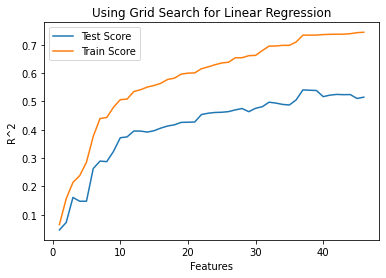

In [35]:
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Features')
plt.ylabel('R^2')
plt.title("Using Grid Search for Linear Regression")
plt.legend(['Test Score', 'Train Score'], loc='upper left')

In [36]:
n_optimal = 37

lr = LinearRegression()
# lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=n_optimal)  
rfe = rfe.fit(X_train, y_train)
print(sorted(zip(map(lambda x : round(x,4) , rfe.ranking_), X.columns)))

[(1, '2P'), (1, '2P%'), (1, '3P'), (1, '3P%'), (1, '3PA'), (1, '3PAr'), (1, 'AST'), (1, 'AST%'), (1, 'Age'), (1, 'BLK'), (1, 'BLK%'), (1, 'BPM'), (1, 'DBPM'), (1, 'DWS'), (1, 'FG%'), (1, 'FGA'), (1, 'FT'), (1, 'FT%'), (1, 'FTA'), (1, 'FTr'), (1, 'MP'), (1, 'OBPM'), (1, 'ORB%'), (1, 'OWS'), (1, 'PER'), (1, 'PTS'), (1, 'STL'), (1, 'STL%'), (1, 'TOV'), (1, 'TOV%'), (1, 'TRB'), (1, 'TRB%'), (1, 'TS%'), (1, 'VORP'), (1, 'WS'), (1, 'WS/48'), (1, 'eFG%'), (2, 'FG'), (3, 'DRB'), (4, 'G'), (5, '2PA'), (6, 'GS'), (7, 'ORB'), (8, 'DRB%'), (9, 'USG%'), (10, 'PF')]


In [37]:
X_lr = X.drop(['FG',  'DRB', 'G', '2PA', 'GS', 'ORB', 'DRB%', 'USG%', 'PF'], axis = 1)

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X_lr,y,test_size=0.2,random_state=12)

In [39]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R^2:', sklearn.metrics.r2_score(y_test, pred))

MAE: 0.0403254137425929
MSE: 0.0031605219593649784
RMSE: 0.05621851971872773
R^2: 0.6244739023469039


In [42]:
pd.DataFrame(lr.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
Age,0.006128
MP,-0.007750
FGA,-0.012554
FG%,0.165257
3P,0.025024
3PA,-0.035247
3P%,-0.025680
2P,-0.030267
2P%,0.080539
eFG%,0.591224


Text(0, 0.5, 'Predicted')

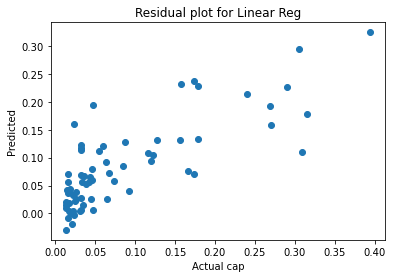

In [43]:
plt.scatter(y_test,pred)
plt.title('Residual plot for Linear Reg')
plt.xlabel('Actual cap')
plt.ylabel('Predicted')

Text(0, 0.5, 'Count')

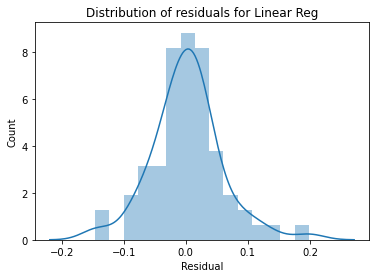

In [44]:
sns.distplot((y_test-pred),bins=15);
plt.title('Distribution of residuals for Linear Reg')
plt.xlabel('Residual')
plt.ylabel('Count')

[Back to top](#Table-of-contents)

### Ridge

In [45]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(data_final,test_size=0.3,random_state=0)
y_train = df_train.pop('cap_percentage')
X_train = df_train
y_test = df_test.pop('cap_percentage')
X_test = df_test

In [46]:
X = data_final.drop(['cap_percentage'],axis=1)
y = data_final.cap_percentage

In [47]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

hyper_params = [{'n_features_to_select': list(range(1, 47))}]

ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
rfe = RFE(ridge)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose = 0,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)                 

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RFE(estimator=Ridge()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2')

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117362,0.017348,0.026028,0.037469,1,{'n_features_to_select': 1},0.129520,-0.052504,0.057064,-0.101868,0.443620,0.095166,0.192188,46,0.301005,0.063904,0.089564,0.016187,0.453543,0.184841,0.166037
1,0.097737,0.013681,0.005151,0.001866,2,{'n_features_to_select': 2},0.149544,-0.048661,0.323850,0.319416,0.441031,0.237036,0.170420,45,0.305212,0.069271,0.301186,0.331163,0.453710,0.292109,0.124540
2,0.106917,0.018107,0.006746,0.004558,3,{'n_features_to_select': 3},0.333605,0.363276,0.313722,0.309252,0.409020,0.345775,0.036920,43,0.456247,0.473705,0.306520,0.336848,0.462503,0.407165,0.070672
3,0.105987,0.014296,0.002254,0.001990,4,{'n_features_to_select': 4},0.299833,0.363193,0.321495,0.304811,0.411592,0.340185,0.042089,44,0.460830,0.473926,0.322663,0.336876,0.465281,0.411915,0.067354
4,0.099467,0.009764,0.004940,0.003745,5,{'n_features_to_select': 5},0.310507,0.364014,0.282123,0.440668,0.415618,0.362586,0.060162,42,0.525146,0.473979,0.454992,0.507663,0.468594,0.486075,0.026117
5,0.090429,0.001064,0.007962,0.003979,6,{'n_features_to_select': 6},0.368928,0.348926,0.285188,0.403624,0.416217,0.364576,0.046385,41,0.552852,0.479325,0.456233,0.518974,0.468629,0.495202,0.035680
6,0.091864,0.011801,0.007683,0.003103,7,{'n_features_to_select': 7},0.364996,0.351636,0.453109,0.399627,0.522360,0.418346,0.062729,40,0.553527,0.479365,0.529287,0.519285,0.542410,0.524775,0.025496
7,0.103428,0.017647,0.005394,0.002388,8,{'n_features_to_select': 8},0.413808,0.351778,0.451688,0.441255,0.520642,0.435834,0.054816,39,0.563385,0.479351,0.536873,0.552631,0.542218,0.534891,0.029219
8,0.086525,0.008768,0.006101,0.002102,9,{'n_features_to_select': 9},0.428652,0.333416,0.450501,0.442352,0.531436,0.437271,0.063132,38,0.563866,0.492205,0.538087,0.552637,0.543740,0.538107,0.024549
9,0.087403,0.016956,0.007424,0.002338,10,{'n_features_to_select': 10},0.440026,0.346327,0.433099,0.442465,0.532653,0.438914,0.059003,37,0.568809,0.496842,0.539227,0.552702,0.544017,0.540319,0.023959


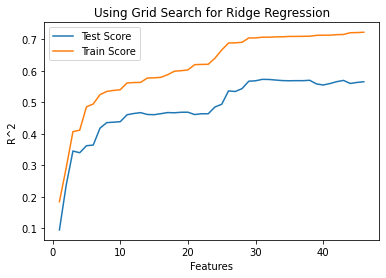

In [49]:
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Features')
plt.ylabel('R^2')
plt.title("Using Grid Search for Ridge Regression")
plt.legend(['Test Score', 'Train Score'], loc='upper left')

In [50]:
n_optimal = 31

ridge = linear_model.Ridge()
# lr.fit(X_train, y_train)

rfe = RFE(ridge, n_features_to_select=n_optimal)  
rfe = rfe.fit(X_train, y_train)
print(sorted(zip(map(lambda x : round(x,4) , rfe.ranking_), X.columns)))

[(1, '2P'), (1, '2P%'), (1, '3P'), (1, '3P%'), (1, '3PA'), (1, '3PAr'), (1, 'AST'), (1, 'AST%'), (1, 'Age'), (1, 'BLK'), (1, 'BPM'), (1, 'DBPM'), (1, 'DRB'), (1, 'DRB%'), (1, 'DWS'), (1, 'FGA'), (1, 'FT'), (1, 'FTA'), (1, 'FTr'), (1, 'MP'), (1, 'OWS'), (1, 'PER'), (1, 'PTS'), (1, 'STL'), (1, 'TOV'), (1, 'TRB'), (1, 'TRB%'), (1, 'TS%'), (1, 'WS'), (1, 'WS/48'), (1, 'eFG%'), (2, 'ORB%'), (3, '2PA'), (4, 'BLK%'), (5, 'FT%'), (6, 'STL%'), (7, 'USG%'), (8, 'TOV%'), (9, 'FG'), (10, 'ORB'), (11, 'PF'), (12, 'G'), (13, 'FG%'), (14, 'VORP'), (15, 'OBPM'), (16, 'GS')]


In [51]:
X_ridge = X.drop(['ORB%',  '2PA', 'BLK%', 'FT%', 'STL%', 'USG%', 
                  'TOV%', 'FG', 'ORB','PF','G','FG%','VORP','OBPM','GS'], axis = 1)

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X_ridge,y,test_size=0.2,random_state=12)

In [53]:
ridge = linear_model.Ridge()
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R^2:', sklearn.metrics.r2_score(y_test, pred))

MAE: 0.04076782737689991
MSE: 0.0030953378456044785
RMSE: 0.05563576049273056
R^2: 0.632218931865501


In [55]:
pd.DataFrame(ridge.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
Age,0.006218
MP,-0.007752
FGA,-0.013398
3P,0.015521
3PA,-0.020763
3P%,-0.023402
2P,-0.015997
2P%,-0.001665
eFG%,-0.008946
FT,0.020741


Text(0, 0.5, 'Predicted')

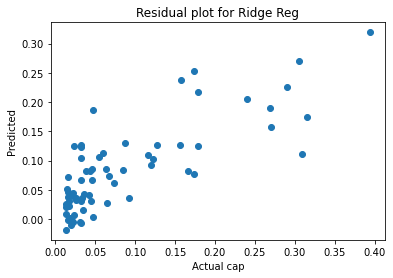

In [56]:
plt.scatter(y_test,pred)
plt.title('Residual plot for Ridge Reg')
plt.xlabel('Actual cap')
plt.ylabel('Predicted')

Text(0, 0.5, 'Count')

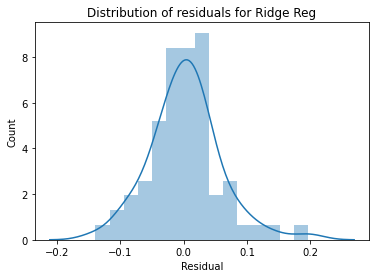

In [57]:
sns.distplot((y_test-pred),bins=15);
plt.title('Distribution of residuals for Ridge Reg')
plt.xlabel('Residual')
plt.ylabel('Count')

[Back to top](#Table-of-contents)

### Random Forest

In [58]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(data_final,test_size=0.3,random_state=0)
y_train = df_train.pop('cap_percentage')
X_train = df_train
y_test = df_test.pop('cap_percentage')
X_test = df_test

In [59]:
rforest = RandomForestRegressor(random_state=0)
rforest.fit(X_train, y_train)

y_pred=rforest.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', sklearn.metrics.r2_score(y_test, y_pred))

MAE: 0.03427699775562162
MSE: 0.0025503242403395795
RMSE: 0.05050073504751767
R^2: 0.6952852635559954


Text(0, 0.5, 'Predicted')

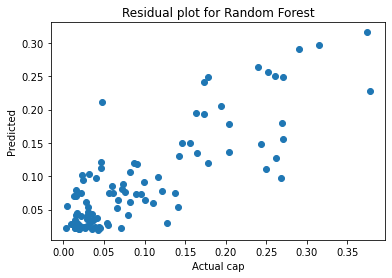

In [60]:
plt.scatter(y_test,y_pred)
plt.title('Residual plot for Random Forest')
plt.xlabel('Actual cap')
plt.ylabel('Predicted')

Text(0, 0.5, 'Count')

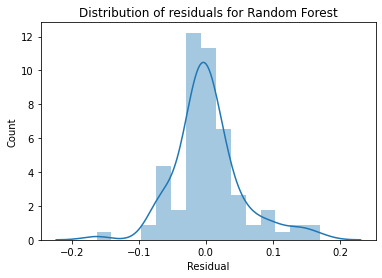

In [61]:
sns.distplot((y_test-y_pred),bins=15);
plt.title('Distribution of residuals for Random Forest')
plt.xlabel('Residual')
plt.ylabel('Count')

[Back to top](#Table-of-contents)

### Gradient Boosting

In [62]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(data_final,test_size=0.3,random_state=0)
y_train = df_train.pop('cap_percentage')
X_train = df_train
y_test = df_test.pop('cap_percentage')
X_test = df_test

In [63]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', sklearn.metrics.r2_score(y_test, y_pred))

MAE: 0.03689816663046202
MSE: 0.0030006249620259788
RMSE: 0.054777960550078705
R^2: 0.6414829808662672


Text(0, 0.5, 'Predicted')

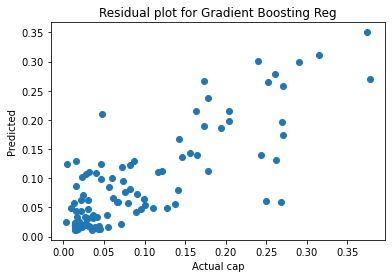

In [64]:
plt.scatter(y_test,y_pred)
plt.title('Residual plot for Gradient Boosting Reg')
plt.xlabel('Actual cap')
plt.ylabel('Predicted')

Text(0, 0.5, 'Count')

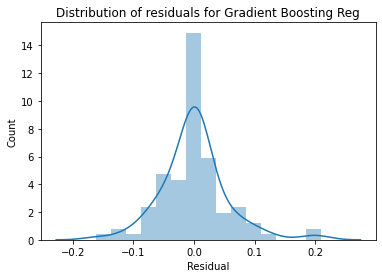

In [65]:
sns.distplot((y_test-y_pred),bins=15);
plt.title('Distribution of residuals for Gradient Boosting Reg')
plt.xlabel('Residual')
plt.ylabel('Count')

[Back to top](#Table-of-contents)

### Model Comparison

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10,random_state=123)
mean=[]
accuracy=[]
std=[]
names=['Linear','Ridge','Random Forest','Gradient Boosting']
models=[lr,ridge,rforest,gbr]
for i in models:
    model =i
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='r2')
    cv_result=cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    if model == lr:
        lr_val = cv_result
    elif model == ridge:
        ridge_val = cv_result
    elif model == rforest:
        rforest_val = cv_result
    else:
        gbr_val = cv_result
models_df = pd.DataFrame({'CV Mean':mean,'Std':std},index=names)
models_df

,CV Mean,Std
Linear,0.530117,0.153834
Ridge,0.557224,0.138456
Random Forest,0.638444,0.115346
Gradient Boosting,0.653657,0.128325


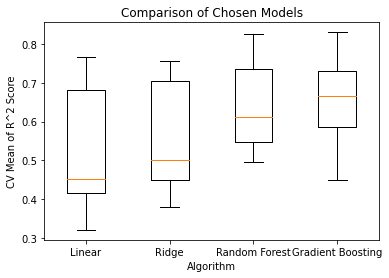

In [67]:
fig, ax = plt.subplots()
ax.boxplot(accuracy)
ax.set_xticklabels(names)
plt.title('Comparison of Chosen Models')
plt.xlabel('Algorithm')
plt.ylabel('CV Mean of R^2 Score')
plt.show()

In [68]:
t,p=stats.ttest_ind(lr_val,ridge_val)
print('T-test for linear regression and ridge regression CV means:', p)
t,p=stats.ttest_ind(lr_val,rforest_val)
print('T-test for linear regression and random forest regression CV means:',p)
t,p=stats.ttest_ind(lr_val,gbr_val)
print('T-test for linear regression and gradient boosting regression CV means:',p)
t,p=stats.ttest_ind(ridge_val,rforest_val)
print('T-test for ridge regression and random forest regression CV means:',p)
t,p=stats.ttest_ind(ridge_val,gbr_val)
print('T-test for ridge regression and gradient boosting regression CV means:',p)
t,p=stats.ttest_ind(rforest_val,gbr_val)
print('T-test for random forest regression and gradient boosting regression CV means:',p)

T-test for linear regression and ridge regression CV means: 0.6989876841310533
T-test for linear regression and random forest regression CV means: 0.10823368275024793
T-test for linear regression and gradient boosting regression CV means: 0.08079286951350939
T-test for ridge regression and random forest regression CV means: 0.19308638387458235
T-test for ridge regression and gradient boosting regression CV means: 0.1427927385991806
T-test for random forest regression and gradient boosting regression CV means: 0.7943984719404621


[Back to top](#Table-of-contents)

## 5. Results

The multiple linear regression (MLR) model was fairly accurate in the predictions it made. The RMSE of 0.0562 and $R^{2}$ score of 0.6245 indicate that the model performed well.

The ridge regression model appeared to perform marginally better than the MLR with a slightly smaller RMSE of 0.0556 and a slightly larger $R^{2}$ score of 0.6322. 

The random forest model appeared to perform better than both the MLR and the ridge with a smaller RMSE of 0.0505 and a larger $R^{2}$ of 0.6953.

The gradient boosting model appeared to perform worse than the random forest but better than the other two models with an RMSE of 0.0548 and a $R^{2}$ of 0.6415.

However, performing 10-fold cross-validation revealed that gradient boosting regression performed slightly better than random forest regression with CV means for $R^{2}$ prediction scores of 0.6537 and 0.6384 respectively. MLR and ridge had CV means of 0.5301 and 0.5572 respectively. A t-test of independence was performed between each of the potential pairs to determine if there was a statistical difference in performance but this was not found to be the case.

[Back to top](#Table-of-contents)

## 6. Conclusion

All models were fairly accurate with predicting NBA player salary as can be seen with CV means for the $R^{2}$ scores of the models' predictions. At first glance, it seemed that random forest regression performed the best due to its highest $R^{2}$ score and its lowest RMSE but 10-fold cross-validation indicated that gradient boosting regression was a slightly better option. However, none of the pairwise t-tests indicated that no single model had a performance that was statistically superior to another so the null hypothesis that all models have the same performance cannot be rejected. This can likely be attributed to the high variance in the performance of each model as can be seen in the table of CV means and the accompanying boxplot. Thus, in the case of NBA player salaries, gradient boosting regression and random forest regression appear to be superior than linear models but not in a manner that is statistically significant. Given that the models using decision trees seemingly had superior performance, future avenues for this project would seek to identify the source of variability in model performance and reduce it for the purpose of increasing model precision. These steps would allow for the reliable recommendation of models with seemingly superior performance.  

[Back to top](#Table-of-contents)

## Sources

**Data:** 

- https://www.basketball-reference.com/leagues/NBA_2021_totals.html

- https://www.basketball-reference.com/contracts/players.html

**Additional References:**

- Course materials

- https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

- https://cbabreakdown.com/salary-cap-overview

- https://heavy.com/sports/2019/05/nba-supermax-contract-how-much-salary/

- https://www.basketball-reference.com/contracts/

- https://nba.nbcsports.com/2020/10/26/report-nba-teams-told-salary-cap-wouldnt-dip-below-109m/

- https://www.basketball-reference.com/about/glossary.html

[Back to top](#Table-of-contents)